In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from msresist.clustering import DDMC
from msresist.pre_processing import preprocessing
from msresist.figures.common import plotDistanceToUpstreamKinase, Introduce_Correct_DDMC_labels

In [2]:
matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [3]:
# Import siganling data
X = preprocessing(AXLm_ErlAF154=True, Vfilter=True, FCfilter=True, log2T=True, mc_row=True)
d = X.select_dtypes(include=['float64']).T
i = X.select_dtypes(include=['object'])

# Fit DDMC
ddmc = DDMC(i, n_components=5, SeqWeight=2, distance_method="PAM250", random_state=5).fit(d)

/home/creixell/AXLomics/msresist/pre_processing.py:121: FutureWarning: The provided callable <function mean at 0x7f39e41b8a40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(X, values=values, index=indices, aggfunc=np.mean)
/home/creixell/AXLomics/msresist/pre_processing.py:284: FutureWarning: The provided callable <function mean at 0x7f39e41b8a40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  X = pd.pivot_table(triplicates, values=triplicates[data_headers].columns, index=merging_indices, aggfunc=func_tri)
/home/creixell/AXLomics/msresist/pre_processing.py:284: FutureWarning: The provided callable <function std at 0x7f39e41b8b80> is currently using SeriesGroupBy.std. In a future version of pandas, the provided 

/home/creixell/AXLomics/msresist/clustering.py:166: RuntimeWarning: invalid value encountered in divide
  pssm /= back_pssm.copy()
/home/creixell/AXLomics/msresist/clustering.py:182: RuntimeWarning: divide by zero encountered in log2
  pssm.loc[p_site, 5] = np.log2(clSeq.loc[p_site, 5] / tm)
/home/creixell/AXLomics/msresist/clustering.py:166: RuntimeWarning: invalid value encountered in divide
  pssm /= back_pssm.copy()
/home/creixell/AXLomics/msresist/clustering.py:166: RuntimeWarning: invalid value encountered in divide
  pssm /= back_pssm.copy()
/home/creixell/AXLomics/msresist/clustering.py:166: RuntimeWarning: invalid value encountered in divide
  pssm /= back_pssm.copy()
/home/creixell/AXLomics/msresist/clustering.py:182: RuntimeWarning: divide by zero encountered in log2
  pssm.loc[p_site, 5] = np.log2(clSeq.loc[p_site, 5] / tm)
/home/creixell/AXLomics/msresist/clustering.py:166: RuntimeWarning: invalid value encountered in divide
  pssm /= back_pssm.copy()
/home/creixell/AXLomi

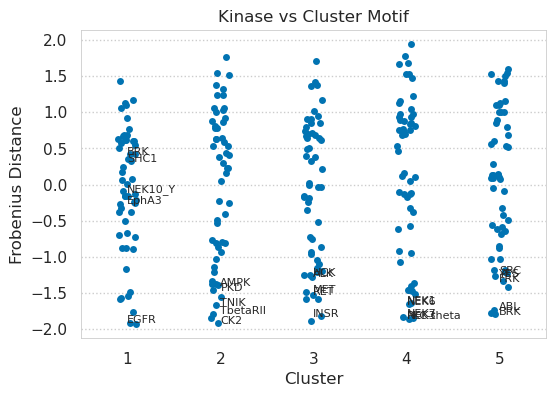

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(6, 4))
plotDistanceToUpstreamKinase(ddmc, [1, 2, 3, 4, 5], ax, kind="strip", num_hits=5, additional_pssms=False, add_labels=False, title=False, PsP_background=False)

**Note that although the underlying model is the same, the cluster labels are different from those in the paper:

- 1 here is 4 in the paper
- 2 here is 5 in the paper
- 3 here is 3 in the paper
- 4 here is 1 in the paper
- 5 here is 2 in the paper

In [5]:
X = preprocessing(AXL_Das_DR=True, Vfilter=True, log2T=True, mc_row=False)
for i in range(X.shape[0]):
    X.iloc[i, 6:11] -= X.iloc[i, 6]
    X.iloc[i, 11:] -= X.iloc[i, 11]

/home/creixell/AXLomics/msresist/pre_processing.py:121: FutureWarning: The provided callable <function mean at 0x7f39e41b8a40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(X, values=values, index=indices, aggfunc=np.mean)
/home/creixell/AXLomics/msresist/pre_processing.py:284: FutureWarning: The provided callable <function mean at 0x7f39e41b8a40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  X = pd.pivot_table(triplicates, values=triplicates[data_headers].columns, index=merging_indices, aggfunc=func_tri)
/home/creixell/AXLomics/msresist/pre_processing.py:284: FutureWarning: The provided callable <function std at 0x7f39e41b8b80> is currently using SeriesGroupBy.std. In a future version of pandas, the provided 

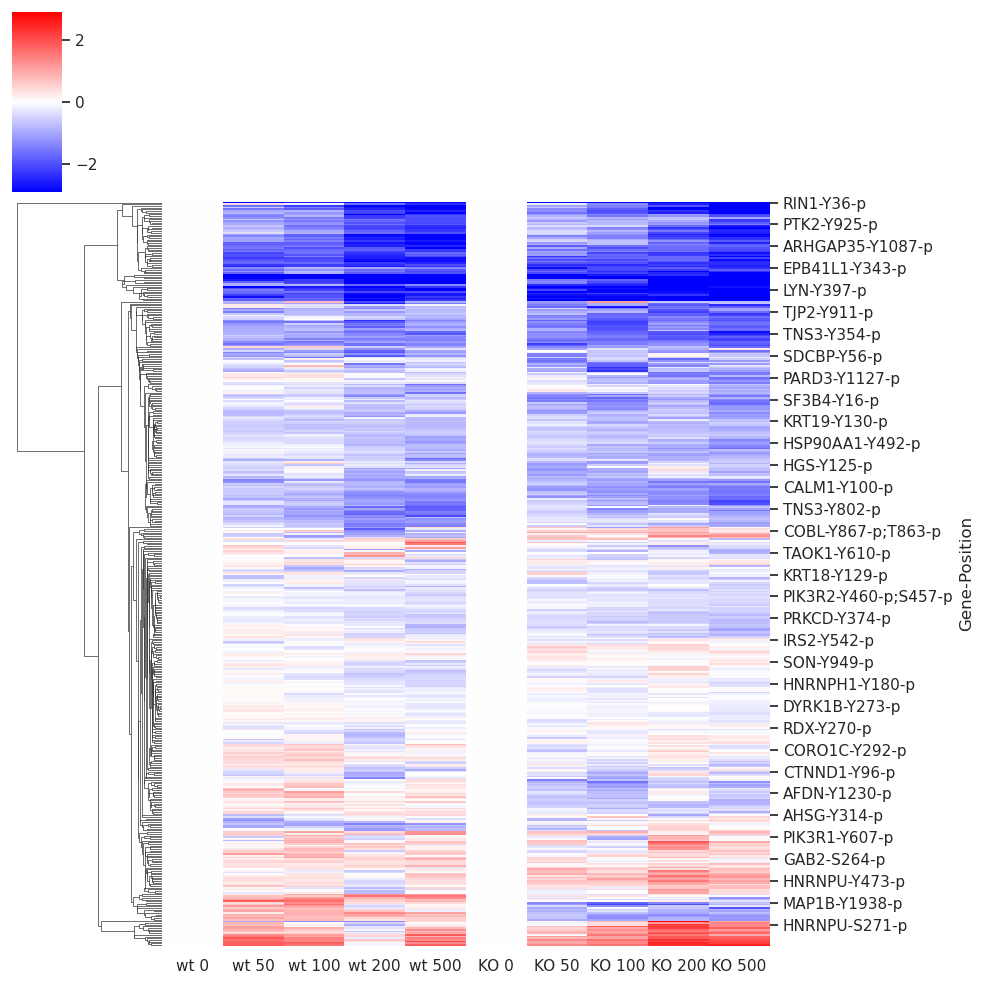

In [6]:
data = X.set_index(["Gene", "Position"]).select_dtypes(include=["float64"])
lim = np.max(abs(data.values)) * 0.5
g = sns.clustermap(data, method="centroid", cmap="bwr", robust=True, vmax=lim, vmin=-lim, figsize=(10, 10), xticklabels=True, col_cluster=False)
data_dr = X.iloc[g.dendrogram_row.reordered_ind[:55], :].set_index(["Gene", "Position"]).select_dtypes(include=["float64"])

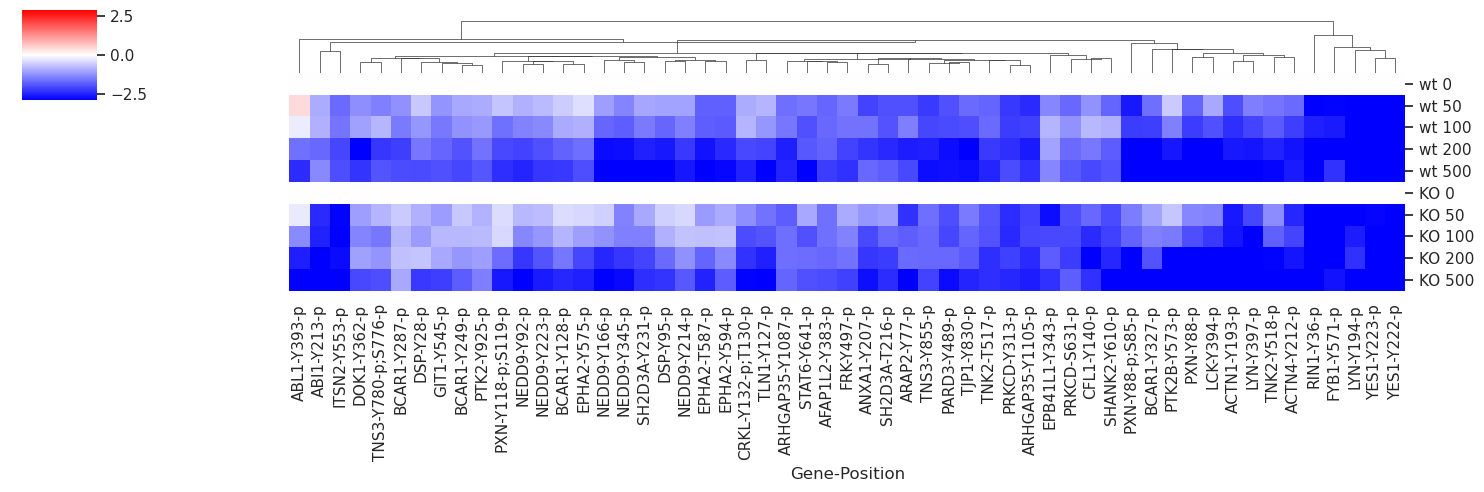

In [7]:
sns.clustermap(data_dr.T, method="centroid", cmap="bwr", robust=True, vmax=lim, vmin=-lim, figsize=(15, 5), xticklabels=True, col_cluster=True, row_cluster=False)